In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re
from sklearn.svm import SVC
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle

In [2]:
mat=loadmat("data_pulso3.mat")
dadostrain=mat["Train_7030"]
X=mat["Xtrain_7030"]
y=mat["ytrain_7030"]

dadostest=mat["Test_7030"]
Xtest=mat["Xtest_7030"]
ytest=mat["ytest_7030"]

m = len(y)
mtest = len(ytest)
print(m)
print(mtest)

print(dadostrain.shape)
print(y.shape)
print(X.shape)

print(dadostest.shape)
print(ytest.shape)
print(Xtest.shape)

#print(dadostrain)
#print(dadostest)

1199
513
(1199, 16)
(1199, 1)
(1199, 15)
(513, 16)
(513, 1)
(513, 15)


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Xtest = scaler.fit_transform(Xtest)
dadostrain=scaler.fit_transform(dadostrain)
dadostest=scaler.fit_transform(dadostest)

In [4]:
#from sklearn import utils
#from sklearn.utils import shuffle

#dadostrain1=shuffle(dadostrain)

#dadostest1=shuffle(dadostest)

#print(dadostrain1)
#print(dadostest1)


In [4]:
dadostrain=pd.DataFrame(data=dadostrain)
dadostest=pd.DataFrame(data=dadostest)

dadostrain1 = dadostrain.sample(frac=1).reset_index(drop=True)
dadostest1=dadostest.sample(frac=1).reset_index(drop=True)

In [5]:
dadostrain1=dadostrain1.values
Xtrain1=dadostrain1[:,0:14]
ytrain1=dadostrain1[:,-1]

dadostest1=dadostest1.values
Xtest1=dadostest1[:,0:14]
ytest1=dadostest1[:,-1]

# RBF

In [6]:
def dataset3Params_rbf(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(kernel="rbf",C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma,prediction

In [7]:
vals = [0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]
best_C, best_gamma, prediction = dataset3Params_rbf(Xtrain1, ytrain1.ravel(), Xtest1, ytest1.ravel(),vals)

print('Best C:', best_C)
print('Best gamma:', best_gamma)
print('Best sigma:', 1/best_gamma)

classifier4 = SVC(C=best_C,gamma=best_gamma)
classifier4.fit(Xtrain1,ytrain1.ravel())
prediction4 = classifier4.predict(Xtest1)

print(classifier4.score(Xtrain1,ytrain1))
print(classifier4.score(Xtest1,ytest1))

Best C: 7.03
Best gamma: 0.19054878048780488
Best sigma: 5.248
0.7022518765638032
0.7582846003898636


[[325  31]
 [ 93  64]]
[[817   3]
 [354  25]]


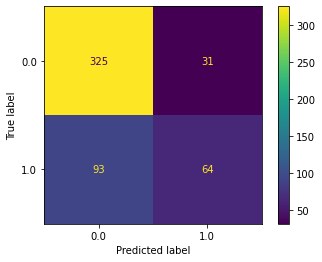

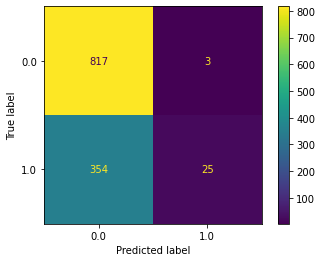

In [9]:
disp2=plot_confusion_matrix(classifier4,Xtest1,ytest1)
print(disp2.confusion_matrix)

disp1=plot_confusion_matrix(classifier4,Xtrain1,ytrain1)
print(disp1.confusion_matrix)


Text(0.5, 0, 'Permutation Importance')

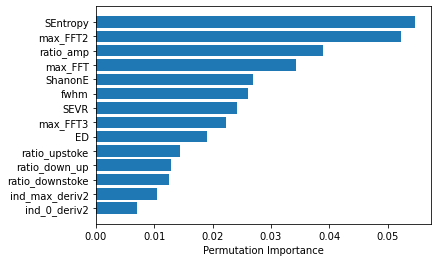

In [9]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier4, Xtest1, ytest1)
feature_names = ['ratio_down_up', 'ratio_amp', 'ratio_downstoke', 'SEVR','ED', 'ind_max_deriv2','ind_0_deriv2', 'ratio_upstoke','SEntropy','ShanonE','max_FFT','max_FFT2','max_FFT3','fwhm','idade']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [8]:
from sklearn.metrics import f1_score
#F1 score
print(f1_score(ytest1,prediction4))
print(f1_score(ytest1,prediction))

0.5079365079365079
0.3076923076923077


In [11]:
from sklearn.metrics import average_precision_score

#Recall
y_score1 = classifier4.decision_function(Xtest1)
average_precision1 = average_precision_score(ytest1, y_score1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision1))

Average precision-recall score: 0.53


# ------------------------------------------

In [12]:
param_grid2=[{'kernel': ['rbf'], 'gamma':  np.arange(0.1,10,0.198),
                     'C': np.arange(0.1,10,0.198)}]
#50 pontos
adv_svr_fine2 = GridSearchCV(SVC(),param_grid2)

In [13]:
adv_svr_fine2.fit(Xtrain1,ytrain1.ravel())

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'gamma': array([0.1  , 0.298, 0.496, 0.694, 0.892, 1.09 , 1.288, 1.486, 1.684,
       1.882, 2.08 , 2.278, 2.476, 2.674, 2.872, 3.07 , 3.268, 3.466,
       3.664, 3.862, 4.06 , 4.258, 4.456, 4.654, 4.852, 5.05 , 5.248,
       5.446, 5.644, 5.842, 6.04 , 6.238, 6.436, 6.634, 6.832, 7.03 ,
       7.228, 7.426, 7.624, 7.822, 8.02 , 8.218, 8.416, 8.614, 8.812,
       9.01 , 9.208, 9.406, 9.604, 9.802]),
                          'kernel': ['rbf']}])

In [14]:
best_par2 = adv_svr_fine2.best_estimator_.get_params()
print(best_par2['C'])
print(best_par2['gamma'])

classifier2 = SVC(kernel="rbf",C=best_par2['C'], gamma=best_par2['gamma'])
classifier2.fit(Xtrain1,ytrain1.ravel())
prediction2 = classifier2.predict(Xtest1)

2.2780000000000005
7.426000000000001


[[329  27]
 [145  12]]
[[797  23]
 [ 81 298]]


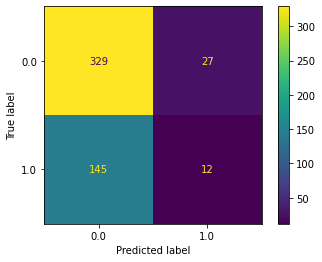

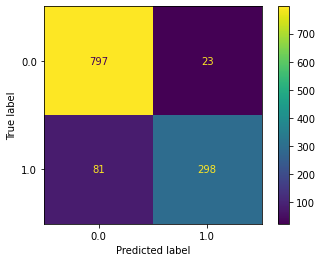

In [15]:
disp2=plot_confusion_matrix(classifier2,Xtest1,ytest1)
print(disp2.confusion_matrix)

disp1=plot_confusion_matrix(classifier2,Xtrain1,ytrain1)
print(disp1.confusion_matrix)

In [16]:
print(classifier2.score(Xtrain1,ytrain1))
print(classifier2.score(Xtest1,ytest1))

0.9132610508757297
0.6647173489278753


Text(0.5, 0, 'Permutation Importance')

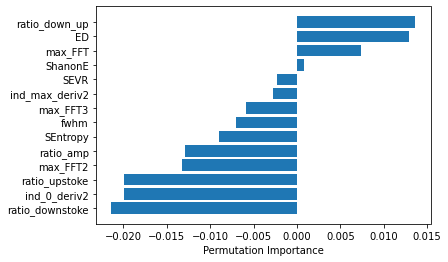

In [17]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier2, Xtest1, ytest1)
feature_names = ['ratio_down_up', 'ratio_amp', 'ratio_downstoke', 'SEVR','ED', 'ind_max_deriv2','ind_0_deriv2', 'ratio_upstoke','SEntropy','ShanonE','max_FFT','max_FFT2','max_FFT3','fwhm','idade']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [18]:
#F1 score
print(f1_score(ytest1,prediction2)) 

0.12244897959183673


In [19]:
#Recall
y_score1 = classifier4.decision_function(Xtest1)
average_precision1 = average_precision_score(ytest1, y_score1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision1))

Average precision-recall score: 0.53
